# Aceleradev Ciencia de Dados
**Autor: Erick Amorim**

# Base de dados

https://www.kaggle.com/rubenssjr/brasilian-houses-to-rent

## Descrição das variáveis

***Colunas***

**- city : Cidade onde o imóvel está localizado / City where the property is located**

**- area : Área do imovel / Property area**

**- rooms: Numero de quartos/ Quantity of rooms**

**- bathroom: Número de banheiros / Quantity of bathroom**

**- parking spaces : Número de vagas / Quantity of parking spaces**

**- floor : Andar / Floor**

**- animal : Aceita animais? / Acept animals?**

**- furniture : Mobilhada? / Furniture?**

**- hoa (RS): Valor do condomínio / Homeowners association tax** 

**- rent amount (RS) : Valor do Aluguel (/) Rent amount** 

**- property tax (RS) : IPTU (/) Property tax**

**- fire insurance (RS) : Seguro Incendio / Fire Insurance**

**- total (RS) : Valor total / Total**

# Importando os Pacotes

In [1]:
import pandas as pd

# Leitura dos dados

In [2]:
df = pd.read_csv("dados/houses_to_rent_v2.csv")

In [3]:
df.head(8)

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
5,São Paulo,376,3,3,7,-,acept,not furnished,0,8000,834,121,8955
6,Rio de Janeiro,72,2,1,0,7,acept,not furnished,740,1900,85,25,2750
7,São Paulo,213,4,4,4,4,acept,not furnished,2254,3223,1735,41,7253


In [4]:
df.shape

(10692, 13)

## tipos de dados

In [5]:
df.dtypes

city                   object
area                    int64
rooms                   int64
bathroom                int64
parking spaces          int64
floor                  object
animal                 object
furniture              object
hoa (R$)                int64
rent amount (R$)        int64
property tax (R$)       int64
fire insurance (R$)     int64
total (R$)              int64
dtype: object

In [6]:
df.dtypes.value_counts()

int64     9
object    4
dtype: int64

**Verificando se há variáveis com valores faltantes**

In [7]:
df.isna().sum()

city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
rent amount (R$)       0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
dtype: int64

# Explorando o valor do aluguel (variável 'rent amount RS )

## Calculando algumas estatísticas descritivas

_renomeando a coluna '**rent amount (R$)**'_

In [8]:
df.rename(columns={"rent amount (R$)": "valor_aluguel"}, inplace = True)

In [9]:
df.columns

Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa (R$)', 'valor_aluguel', 'property tax (R$)',
       'fire insurance (R$)', 'total (R$)'],
      dtype='object')

_Calculando a média do preço dos aluguéis_

In [10]:
df["valor_aluguel"].mean()

3896.247194163861

_Calculando a mediana do preço dos aluguéis_

In [11]:
df["valor_aluguel"].median()

2661.0

_Calculando o desvio padrão do preço dos aluguéis_

In [12]:
df["valor_aluguel"].std()

3408.5455176710675

_Calculando algumas estatísticas_

In [13]:
df["valor_aluguel"].describe()

count    10692.000000
mean      3896.247194
std       3408.545518
min        450.000000
25%       1530.000000
50%       2661.000000
75%       5000.000000
max      45000.000000
Name: valor_aluguel, dtype: float64

## Visualização gráfica

_Criando um gráfico de barras_

In [14]:
#pd.options.plotting.backend = "plotly"

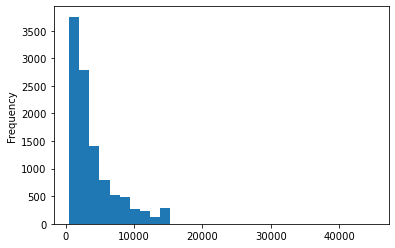

In [16]:
df["valor_aluguel"].plot(kind = "hist", bins = 30);

_Calculando a Assimetria. 
Veja no gráfico que a distribuição é assimétrica e sua calda é mais longa à direita. Portanto essa distribuição é assimétrica positiva_

In [17]:
df["valor_aluguel"].skew()

1.8388773035440982

_Calculando a Curtose_

In [18]:
df["valor_aluguel"].kurtosis()

4.624228179818687

## Verificando a relação de outras variáveis 

**Perguntas**

- _Qual cidade apresenta, em média, o preço do aluguel mais alto?_

- _Quantos banheiros existem nas residências com preços de alugueis mais altos?_

- _Os imóveis mais caros aceitam animais?_

- _Os imóveis mais caros são mobilhados?_


Relembrando das variáveis

In [19]:
df.columns

Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa (R$)', 'valor_aluguel', 'property tax (R$)',
       'fire insurance (R$)', 'total (R$)'],
      dtype='object')

_Cidade com a média de aluguel mais alta_

In [20]:
df.groupby("city")["valor_aluguel"].mean().sort_values(ascending=False)

city
São Paulo         4652.793783
Belo Horizonte    3664.127981
Rio de Janeiro    3232.904064
Campinas          2364.290739
Porto Alegre      2337.699916
Name: valor_aluguel, dtype: float64

_Usando o método **.reset_index()**_

In [21]:
df.groupby("city")["valor_aluguel"].mean().sort_values(ascending=False).reset_index()

,city,valor_aluguel
0,São Paulo,4652.793783
1,Belo Horizonte,3664.127981
2,Rio de Janeiro,3232.904064
3,Campinas,2364.290739
4,Porto Alegre,2337.699916


_Cidade com a mediana de aluguel mais alta_

In [22]:
df.groupby("city")["valor_aluguel"].median().sort_values(ascending = False).reset_index()

,city,valor_aluguel
0,São Paulo,3400
1,Rio de Janeiro,2300
2,Belo Horizonte,2300
3,Porto Alegre,1650
4,Campinas,1500


_Cidades e desvios padrão do preço dos alugueis_

In [23]:
df.groupby("city")["valor_aluguel"].std().sort_values(ascending = False).reset_index()

,city,valor_aluguel
0,São Paulo,3634.612007
1,Belo Horizonte,3493.664840
2,Rio de Janeiro,2804.265614
3,Campinas,2310.903378
4,Porto Alegre,2199.696033


_**Quantos banheiros existem, em média, nas residencias com alugueis mais altos?**_

Aqui iremos definir que as residencias com preços de alugueis mais altos estão acima do percentil 75

In [24]:
df["valor_aluguel"].describe()

count    10692.000000
mean      3896.247194
std       3408.545518
min        450.000000
25%       1530.000000
50%       2661.000000
75%       5000.000000
max      45000.000000
Name: valor_aluguel, dtype: float64

**O resultado acima indica que os alugueis mais altos tem valores acima de 5000 reais.** 

_Vamos definir uma variável chamada de aluguel_alto_

In [25]:
df["aluguel_alto"] = ["Alto" if x > 5000 else "baixo" for x in df["valor_aluguel"]]

In [26]:
df.head(7)

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),valor_aluguel,property tax (R$),fire insurance (R$),total (R$),aluguel_alto
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618,baixo
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973,baixo
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841,baixo
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421,baixo
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836,baixo
5,São Paulo,376,3,3,7,-,acept,not furnished,0,8000,834,121,8955,Alto
6,Rio de Janeiro,72,2,1,0,7,acept,not furnished,740,1900,85,25,2750,baixo


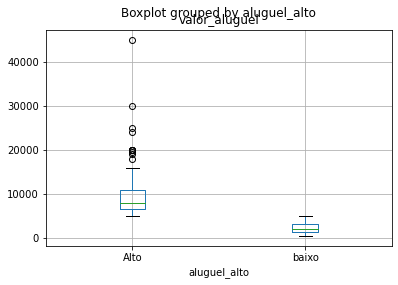

In [27]:
df.boxplot(column = "valor_aluguel", by = "aluguel_alto");

_Contagem do número de alugueis altos_

In [28]:
df["aluguel_alto"].value_counts()

baixo    8153
Alto     2539
Name: aluguel_alto, dtype: int64

Veja que, em média, as residências com preços de alugueis mais altos têm 3,7 banheiros. 
Isto é, tem aproximadamente 4 banheiros.

In [29]:
df.groupby("aluguel_alto")["bathroom"].mean().reset_index()

,aluguel_alto,bathroom
0,Alto,3.729027
1,baixo,1.772108


**Os imóveis com preços mais altos aceitam animais?**

In [30]:
df.groupby("aluguel_alto")["animal"].value_counts()

aluguel_alto  animal   
Alto          acept        2084
              not acept     455
baixo         acept        6232
              not acept    1921
Name: animal, dtype: int64

**Os imóveis com preços mais altos são mobilhados?**

In [31]:
df.groupby("aluguel_alto")["furniture"].value_counts() 

aluguel_alto  furniture    
Alto          not furnished    1661
              furnished         878
baixo         not furnished    6425
              furnished        1728
Name: furniture, dtype: int64

**Hipóteses**

- _São Paulo é a cidade com o preço do aluguel mais alto._

- _Quanto mais banheiros em um imóvel, maior o valor do aluguel._

- _Os imóveis mobilhados tem o valor do aluguel mais alto._

_Quanto mais banheiro existem no imóvel maior é o valor do aluguel?_

Para responder esta pergunta vamos calcular o coeficiente de correlação de Spearman

In [32]:
df[["valor_aluguel", "bathroom"]].corr(method="spearman")

,valor_aluguel,bathroom
valor_aluguel,1.00000,0.71589
bathroom,0.71589,1.00000


_Verificando quais variáveis terão correlação com o valor do aluguel_

criando dataframe com variaveis e seus tipos

In [33]:
aux = pd.DataFrame({"variaveis": df.columns, "tipos": df.dtypes})

In [34]:
aux

,variaveis,tipos
city,city,object
area,area,int64
rooms,rooms,int64
bathroom,bathroom,int64
parking spaces,parking spaces,int64
floor,floor,object
animal,animal,object
furniture,furniture,object
hoa (R$),hoa (R$),int64
valor_aluguel,valor_aluguel,int64


criando lista com variaveis do tipo 'int64'

In [35]:
lista_var_int = list( aux[aux["tipos"] == "int64"]["variaveis"] )

In [36]:
lista_var_int

['area',
 'rooms',
 'bathroom',
 'parking spaces',
 'hoa (R$)',
 'valor_aluguel',
 'property tax (R$)',
 'fire insurance (R$)',
 'total (R$)']

In [37]:
df[lista_var_int].corr(method="pearson")["valor_aluguel"].reset_index()

,index,valor_aluguel
0,area,0.180742
1,rooms,0.541758
2,bathroom,0.668504
3,parking spaces,0.578361
4,hoa (R$),0.036490
5,valor_aluguel,1.000000
6,property tax (R$),0.107884
7,fire insurance (R$),0.987343
8,total (R$),0.264490


# Visualização de Dados

## Pacotes 

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
df["city"].value_counts()

São Paulo         5887
Rio de Janeiro    1501
Belo Horizonte    1258
Porto Alegre      1193
Campinas           853
Name: city, dtype: int64

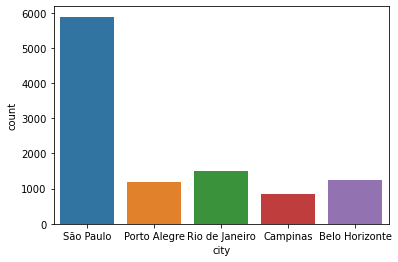

In [40]:
sns.countplot(data = df, x = "city");

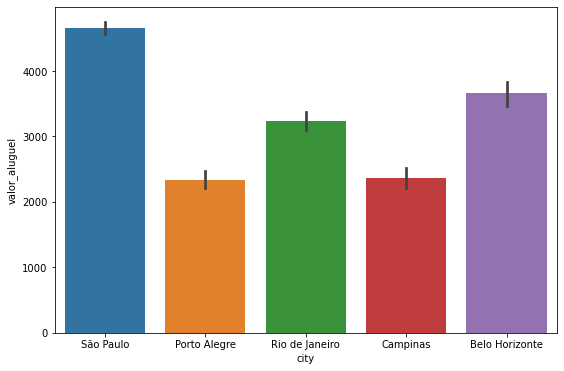

In [41]:
plt.figure(figsize = (9,6) )
sns.barplot(data = df, x = "city", y = "valor_aluguel");

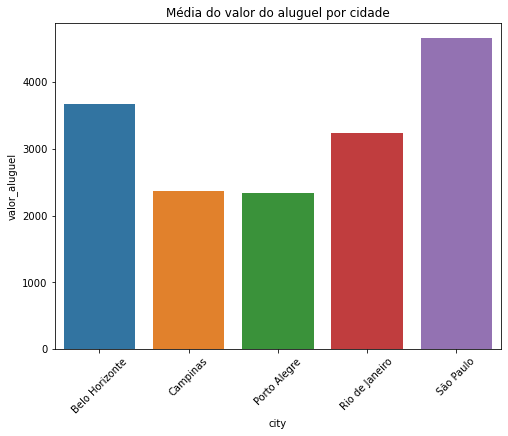

In [42]:
plt.figure(figsize = (8,6))
sns.barplot(data = df.groupby("city")["valor_aluguel"].mean().reset_index(), x = "city", y = "valor_aluguel" );
plt.xticks(rotation = 45)
plt.title("Média do valor do aluguel por cidade")
plt.show()

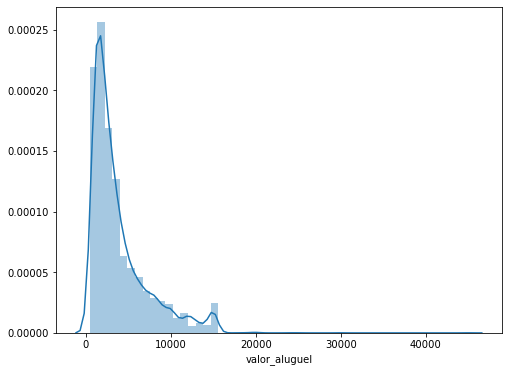

In [43]:
plt.figure(figsize = (8,6))
sns.distplot(df["valor_aluguel"]);

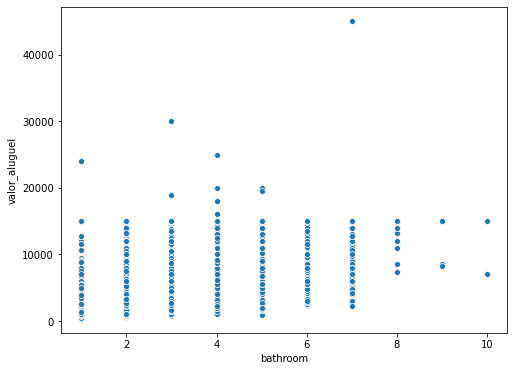

In [44]:
plt.figure(figsize = (8,6))
sns.scatterplot(data = df, x = "bathroom", y = "valor_aluguel");

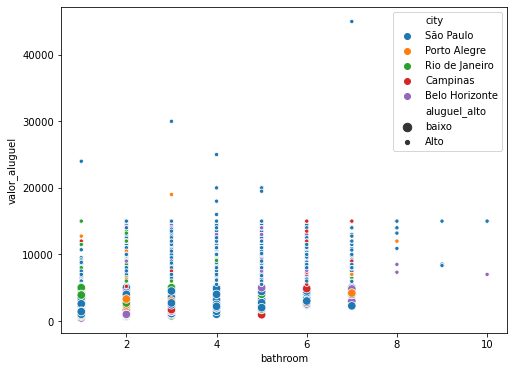

In [45]:
plt.figure(figsize = (8,6))
sns.scatterplot(data = df, x = "bathroom", y = "valor_aluguel", hue = "city", size = "aluguel_alto");

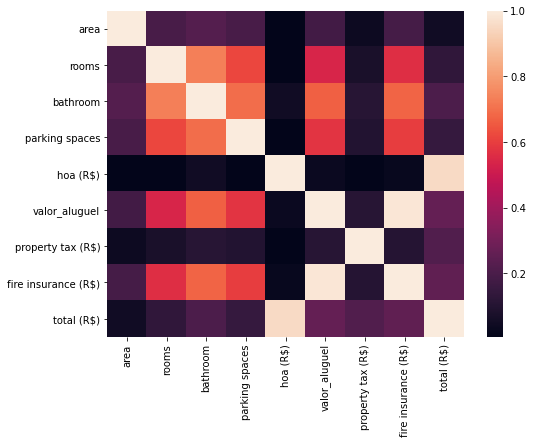

In [46]:
plt.figure(figsize = (8,6))
sns.heatmap(df.corr());

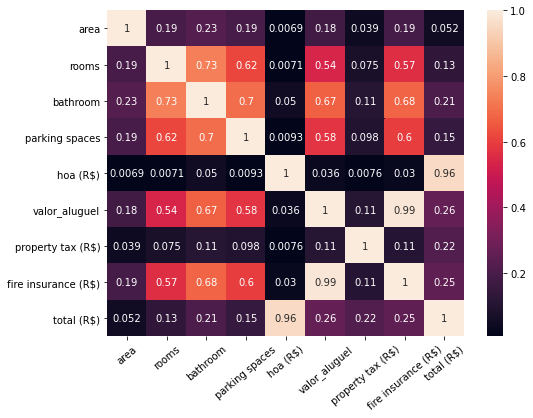

In [47]:
plt.figure(figsize = (8,6))
sns.heatmap(df.corr(), annot = True);
plt.xticks(rotation = 40)
plt.show()

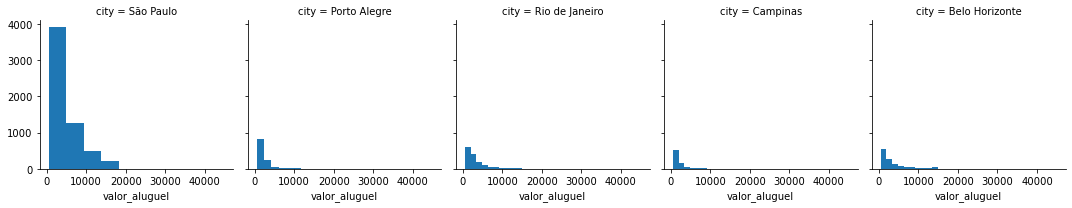

In [48]:
histograma = sns.FacetGrid(data = df, col = "city");
histograma = histograma.map(plt.hist, "valor_aluguel");
plt.show()

<Figure size 576x432 with 0 Axes>

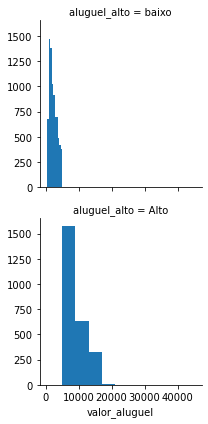

In [49]:
plt.figure(figsize = (8,6))
histograma = sns.FacetGrid(data = df, row = "aluguel_alto")
histograma = histograma.map(plt.hist, "valor_aluguel")

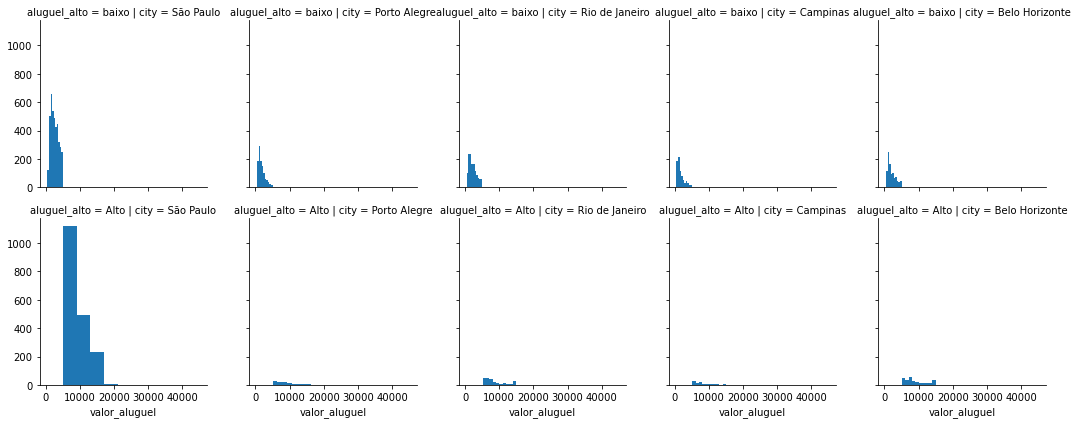

In [50]:
histograma = sns.FacetGrid(data = df, col = "city", row = "aluguel_alto")
histograma = histograma.map(plt.hist, "valor_aluguel")

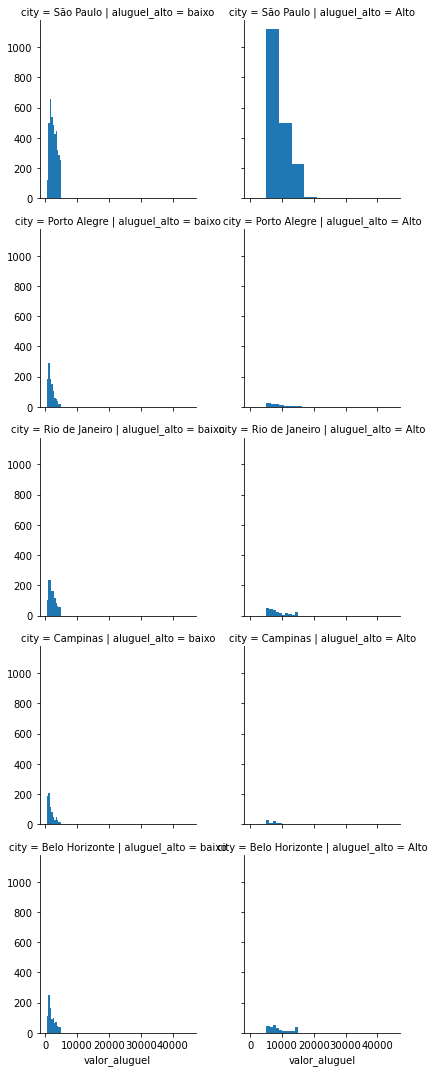

In [51]:
histograma = sns.FacetGrid(data = df, col = "aluguel_alto", row = "city")
histograma = histograma.map(plt.hist, "valor_aluguel")